<a href="https://colab.research.google.com/github/harimoram/Visualizing_H1B_Visa_Data/blob/main/H1B_Visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualizing H1B Visa Data of last 3 years**

##**Introduction:**

This project analyzes H1B visa application data from 2021 to 2023. It aims to uncover insights into skilled worker immigration trends, including employer participation, approval rates, and geographic distribution. Through data visualization and statistical analysis, it provides valuable insights of H1B visa utilization and demand for skilled labor in the U.S. market.

##**About the Dataset:**

The dataset obtained from the USCIS data hub comprises H1B visa application information for the years 2021, 2022, and 2023, encompassing details like employer names, application approvals and denials, NAICS codes, tax IDs, and location specifics. It provides insights into skilled labor immigration trends, showcasing demand across industries and geographic areas in the United States. Analyzing this dataset illuminates employer preferences, immigration patterns, and regional labor demands, aiding in workforce planning and policy formulation.

**Loading the Dataset:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's stored in a CSV file)
df = pd.read_csv('/content/H1B.csv')

**Data Cleaning:**

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Fiscal Year            0
Employer               0
Initial Approval       0
Initial Denial         0
Continuing Approval    0
Continuing Denial      0
NAICS                  0
Tax ID                 0
State                  0
City                   0
ZIP                    0
dtype: int64


In [ ]:
# Mode Imputation for the "Employer" column
mode_val = df['Employer'].mode()[0]
df['Employer'].fillna(mode_val, inplace=True)

# Replace missing values in 'Tax ID' column with 'Unknown'
df['Tax ID'].fillna('Unknown', inplace=True)

# Mode Imputation for the 'State' column
mode_state = df['State'].mode()[0]  # Calculate the mode (most frequent state)
df['State'].fillna(mode_state, inplace=True)  # Fill missing values with the mode

# Mode Imputation for 'City'
mode_city = df['City'].mode()[0]
df['City'].fillna(mode_city, inplace=True)

# Mode imputation for ZIP codes
mode_zip = df['ZIP'].mode()[0]
df['ZIP'].fillna(mode_zip, inplace=True)

**Stats Information of Data:**

In [ ]:
# Display basic statistical information for numerical columns
numerical_stats = df.describe()
print(numerical_stats)

        Fiscal Year  Initial Approval  Initial Denial  Continuing Approval  \
count  65830.000000      65830.000000    65830.000000         65830.000000   
mean    2021.844736          2.629455        0.115813             5.788804   
std        0.773975         33.840566        1.230138            83.285684   
min     2021.000000          0.000000        0.000000             0.000000   
25%     2021.000000          0.000000        0.000000             0.000000   
50%     2022.000000          1.000000        0.000000             1.000000   
75%     2022.000000          1.000000        0.000000             2.000000   
max     2023.000000       3224.000000      129.000000          7439.000000   

       Continuing Denial    NAICS           ZIP  
count       65830.000000  65830.0  65830.000000  
mean            0.161203     54.0  46733.786359  
std             3.117398      0.0  34021.623027  
min             0.000000     54.0    627.000000  
25%             0.000000     54.0  10155.000000

##**Visualizations:**

**Top 6 Employers by H1B Visa Applications:**

This bar plot illustrates the top six employers by the number of H1B visa applications submitted. It showcases the employers with the highest demand for skilled foreign workers, providing insights into the distribution of visa applications among different companies. The visualization aids in identifying key players in the immigration landscape and understanding their impact on workforce diversity and talent acquisition strategies.

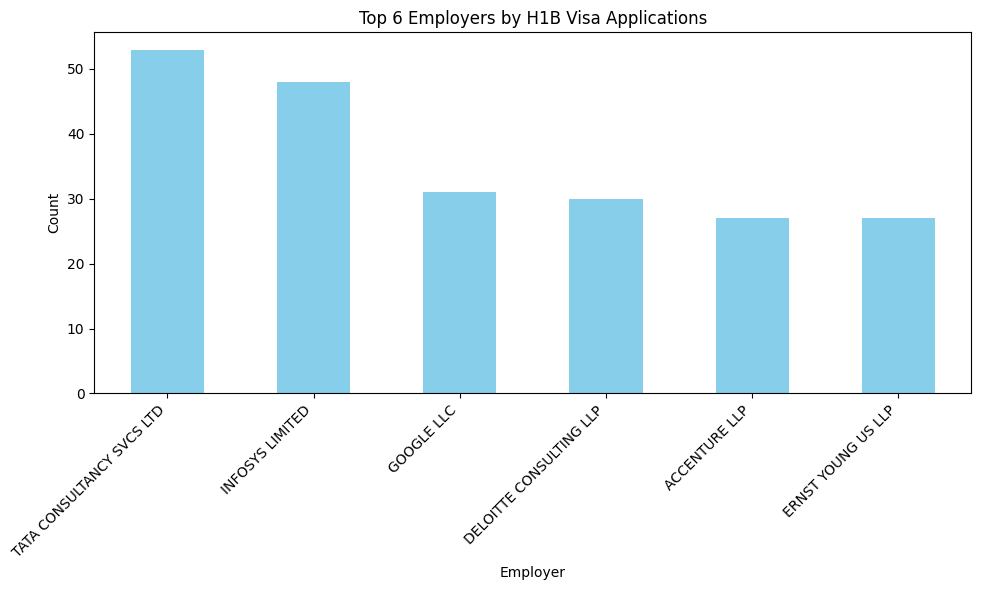

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Step 2: Calculate the count of H1B visa applications by employer
employer_counts = df['Employer'].value_counts()

# Step 3: Sort the counts in descending order to identify the top employers
top_employers = employer_counts.head(6)

# Step 6: Create the visualization
plt.figure(figsize=(10, 6))
top_employers.plot(kind='bar', color='skyblue')
plt.title('Top 6 Employers by H1B Visa Applications')
plt.xlabel('Employer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Approval vs. Denial Rates by Top 10 Employers:**

This stacked bar plot compares the approval and denial rates of H1B visa applications among the top 10 employers with the highest total applications. It offers insights into the success rates of visa applications across different employers, highlighting variations in approval and denial tendencies within this group. The visualization aids in understanding the effectiveness of employers' visa sponsorship processes and their ability to navigate the complexities of the immigration system.

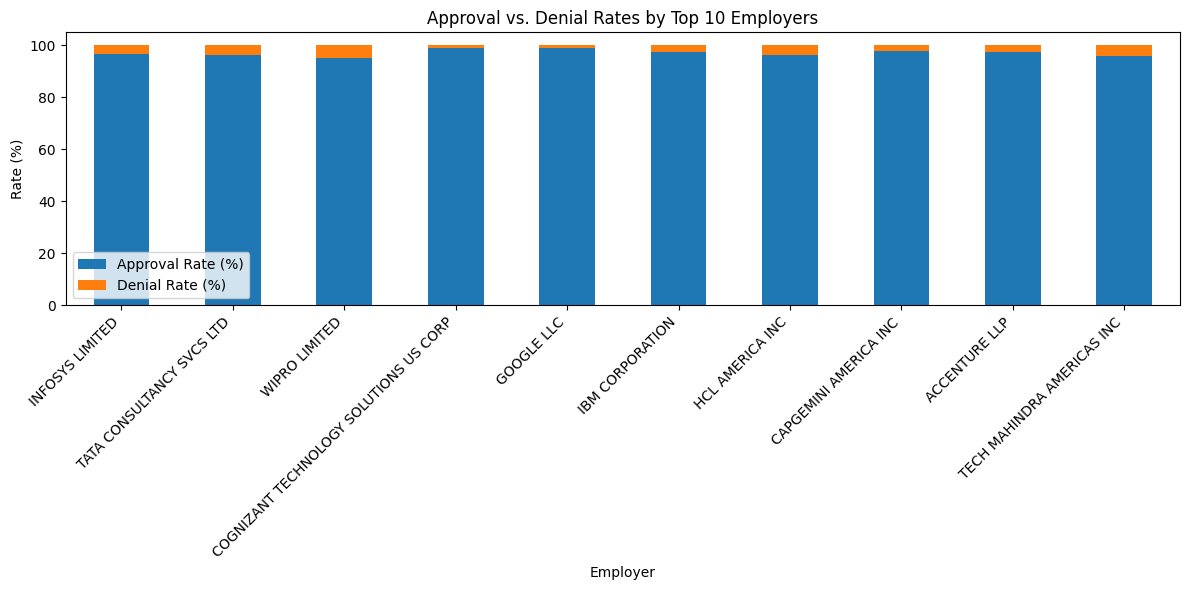

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Group the data by employer and calculate approval and denial rates
approval_denial_rates = df.groupby('Employer')[['Initial Approval', 'Initial Denial']].sum()
approval_denial_rates['Total Applications'] = approval_denial_rates['Initial Approval'] + approval_denial_rates['Initial Denial']
approval_denial_rates['Approval Rate (%)'] = (approval_denial_rates['Initial Approval'] / approval_denial_rates['Total Applications']) * 100
approval_denial_rates['Denial Rate (%)'] = (approval_denial_rates['Initial Denial'] / approval_denial_rates['Total Applications']) * 100

# Filter to the top 10 employers by total applications for clarity
top_10_employers = approval_denial_rates.nlargest(10, 'Total Applications')

# Create the visualization
top_10_employers[['Approval Rate (%)', 'Denial Rate (%)']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Approval vs. Denial Rates by Top 10 Employers')
plt.xlabel('Employer')
plt.ylabel('Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**H1B Visa Application Trends Over Time:**

This line plot illustrates the trends in H1B visa applications over fiscal years, showing counts for initial approvals, denials, continuing approvals, and continuing denials. It offers insights into the fluctuations in visa application volumes and the dynamics of approval and denial rates over time. The visualization aids in understanding the evolving landscape of H1B visa issuance and its potential impact on skilled labor migration patterns.

<Figure size 1200x600 with 0 Axes>

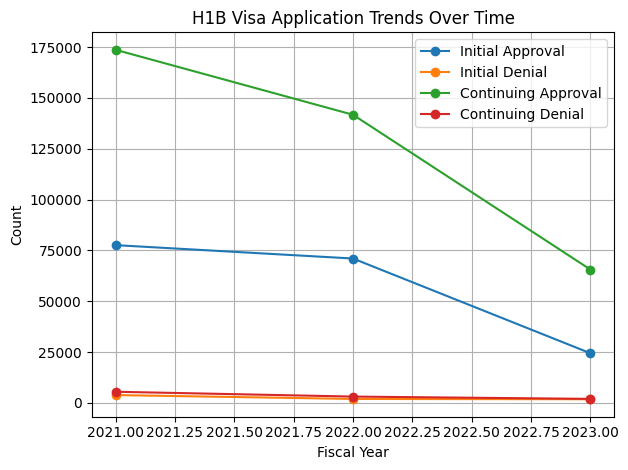

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Group the data by fiscal year and calculate counts of visa applications
yearly_counts = df.groupby('Fiscal Year')[['Initial Approval', 'Initial Denial', 'Continuing Approval', 'Continuing Denial']].sum()

# Create the visualization
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('H1B Visa Application Trends Over Time')
plt.xlabel('Fiscal Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


**Distribution of H1B Visa Applications by State:**

This bar plot illustrates the distribution of H1B visa applications across different states, showcasing the number of applications received from each state. It provides insights into the geographical concentration of visa applications, highlighting states with higher demand for skilled foreign workers. The visualization aids in understanding regional variations in the demand for H1B visas and can inform workforce planning and immigration policies.

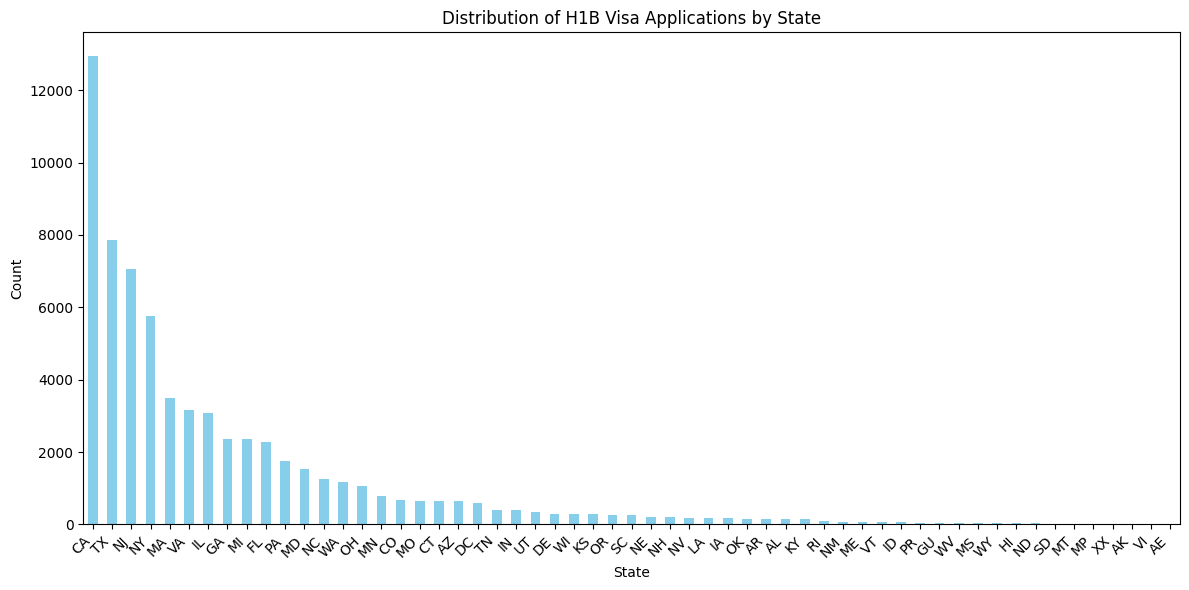

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Group the data by state and calculate counts of visa applications
state_counts = df['State'].value_counts()

# Create the visualization
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of H1B Visa Applications by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#**Conclusion:**

**Insights from Analysis of H1B Visa Application Trends:**

The analysis highlights significant trends and patterns in H1B visa applications from 2021 to 2023. Key insights include the dominance of leading IT firms such as TCS, Infosys, and Google among the top employers, with Infosys, TCS, and Wipro exhibiting noteworthy approval and denial rates. The observed decrease in H1B applications from 2021 to 2023 suggests potential shifts in skilled labor demand. Geographically, California emerges as the top state for H1B visa applications, followed by Texas and New Jersey, indicating regional disparities in demand for skilled workers. These findings underscore the critical role of the IT sector and geographical distribution in shaping skilled labor migration trends. Insights gleaned from this analysis can inform strategic workforce planning, visa application strategies, and policy formulation to meet evolving demands and enhance economic competitiveness.